## Data Science & Business Analytics

# The Sparks Foundation

# Graduate Rotational Internship Program (GRIP)

# Exploratory Data Analysis - Sports (Task 5)

## By - Shuvam Mohapatra



# Importing Modules


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


# Loading of Datasets

In [2]:
os.chdir(r'D:\Companies\Sparks Foundation\Task 5\Self Project')

In [4]:
matches=pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN



# Data Cleaning

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [20]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [88]:
print(matches.duplicated().sum())
print(deliveries.duplicated().sum())
deliveries.drop_duplicates(inplace=True)

0
23


In [26]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [27]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [29]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




# Data Visualization


# A) Highest no of Wins 

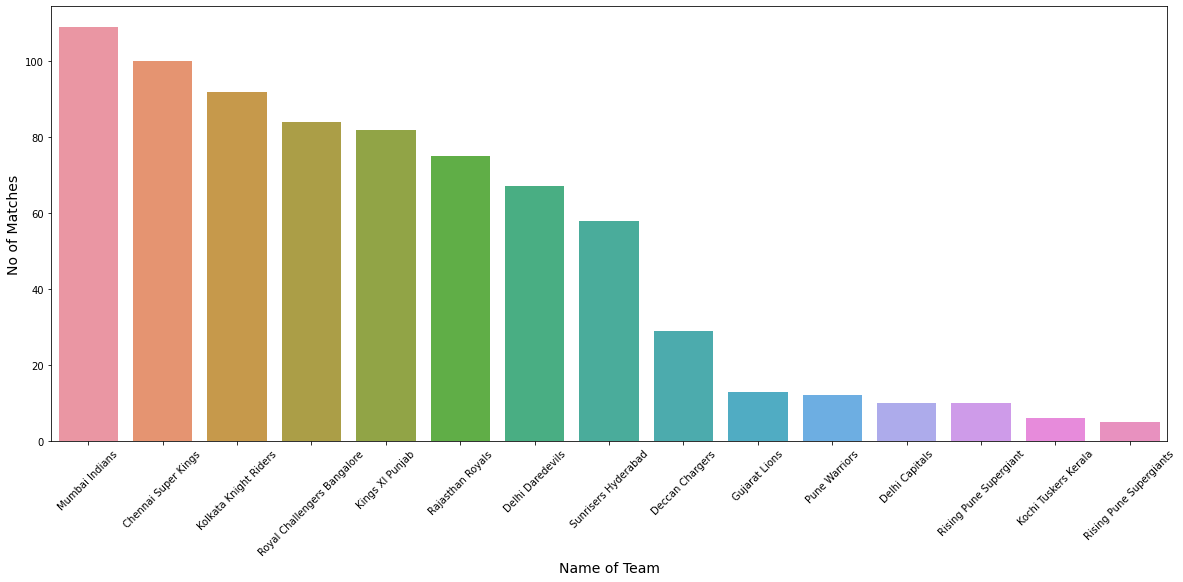

In [50]:
plt.figure(figsize=(20,8))
Win_Teams = matches['winner'].value_counts().reset_index()
Win_Teams .columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = Win_Teams [:20])
plt.xticks(rotation=45)
plt.ylabel('No of Matches',size=14)
plt.xlabel('Name of Team',size=14)
plt.show()

# B) Player of the match 

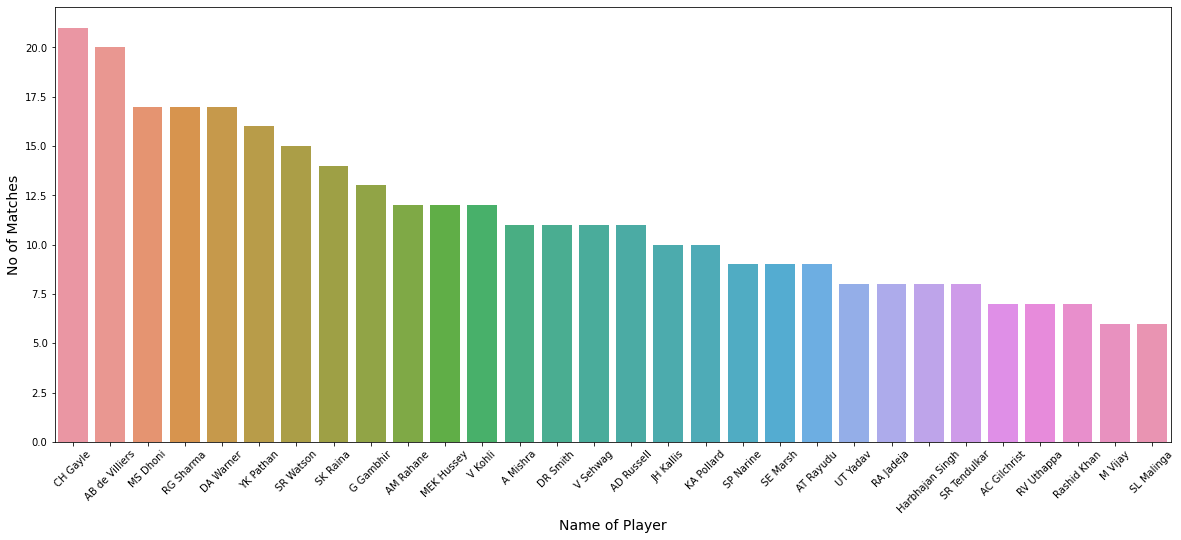

In [49]:
plt.figure(figsize=(20,8))
match_plr= matches['player_of_match'].value_counts().reset_index()
match_plr.columns = ['player_of_match','count']
sns.barplot(x = 'player_of_match',y = 'count', data = match_plr[:30])
plt.xticks(rotation=45)
plt.ylabel('No of Matches',size=14)
plt.xlabel('Name of Player',size=14)
plt.show()

# C) Matches Played in Stadium

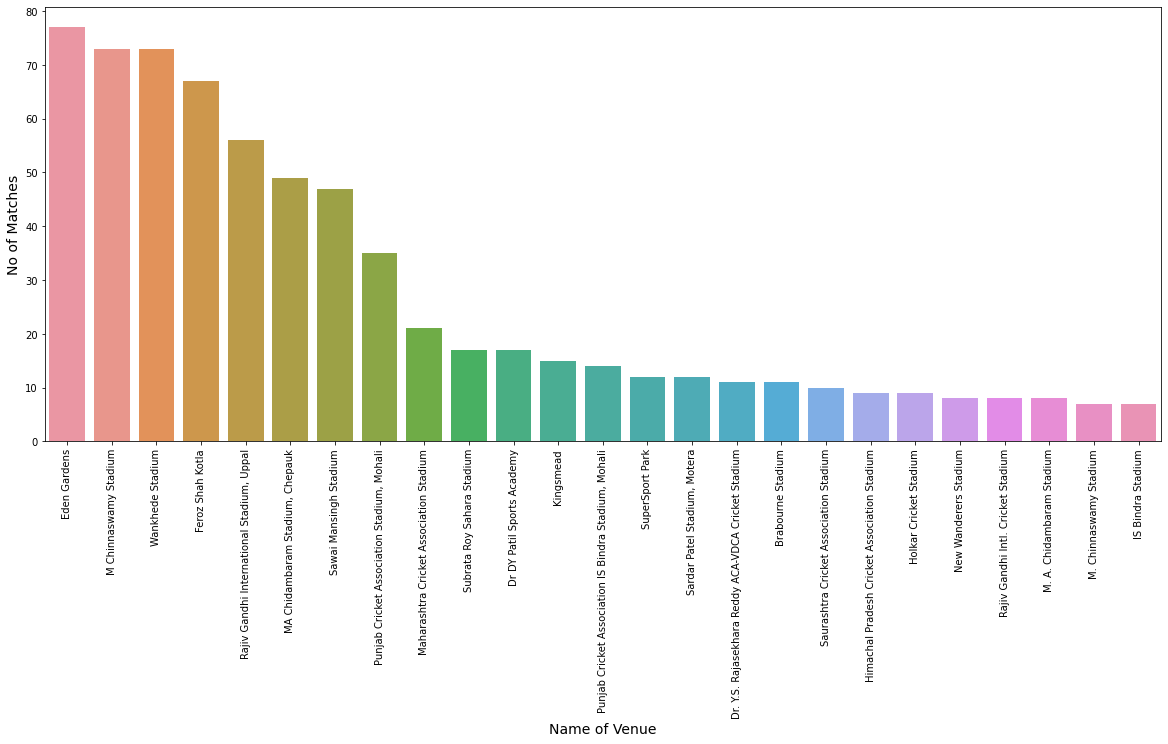

In [48]:
plt.figure(figsize=(20,8))
std_match = matches['venue'].value_counts().reset_index()
std_match.columns = ['venue','count']
sns.barplot(y = 'count',x = 'venue', data = std_match[:25])
plt.xticks(rotation=90)
plt.ylabel('No of Matches',size=14)
plt.xlabel('Name of Venue',size=14)
plt.show()

# D) Preferable Umpires

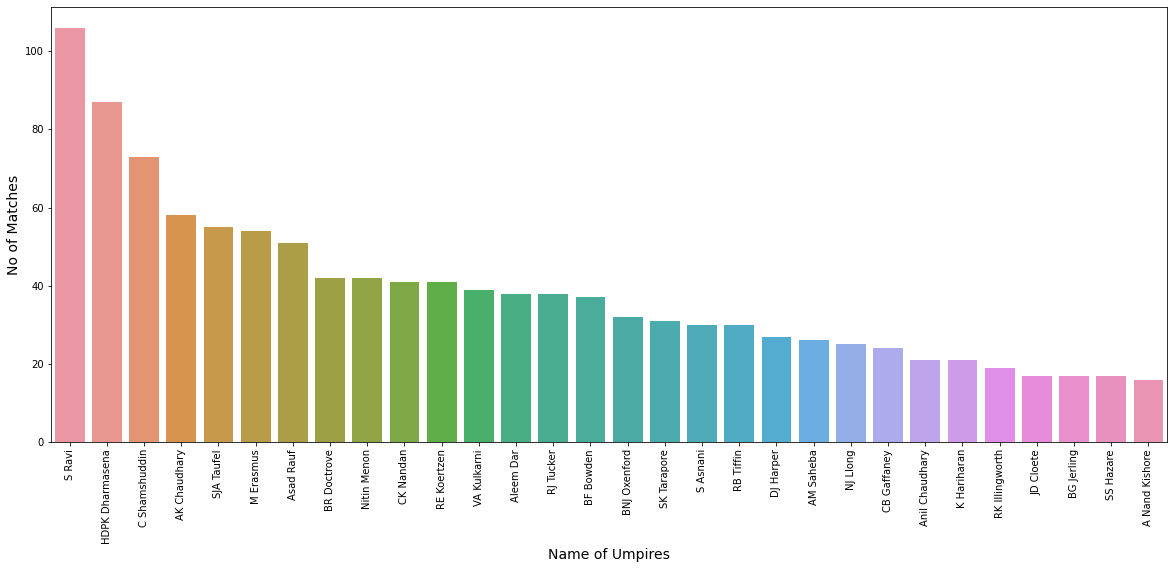

In [47]:
plt.figure(figsize=(20,8))
pr_ump = pd.DataFrame(pd.concat([matches['umpire1'], matches['umpire2']]),columns = ['count'])
pr_ump = pr_ump.apply(pd.value_counts)
sns.barplot(x = pr_ump[:30].index, y= pr_ump[:30]['count'])
plt.xticks(rotation=90)
plt.ylabel('No of Matches',size=14)
plt.xlabel('Name of Umpires',size=14)
plt.show()

# E) High Run Scorer 

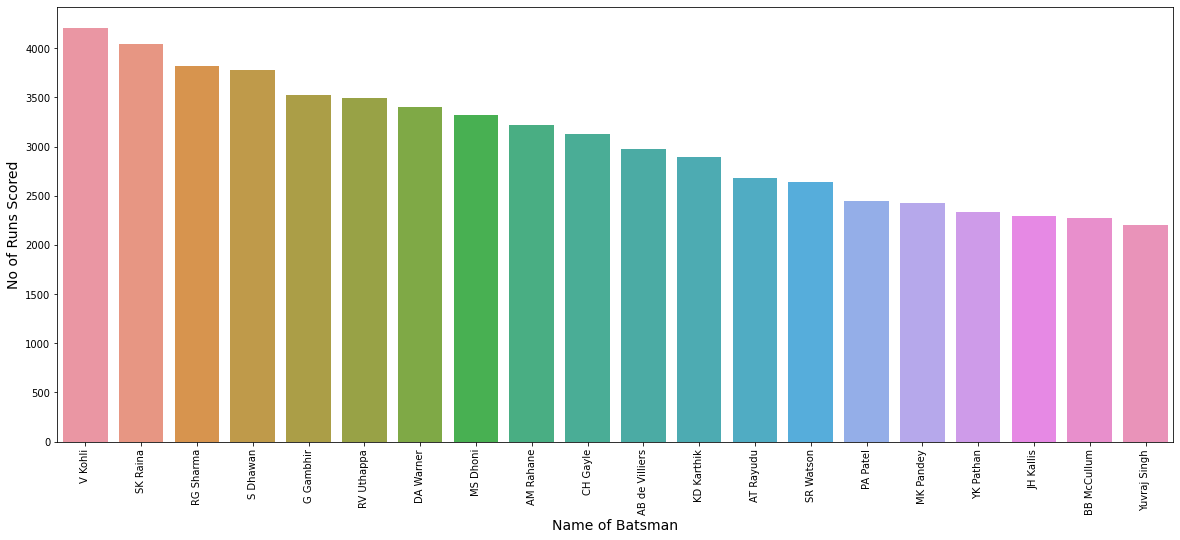

In [52]:
plt.figure(figsize=(20,8))
high_scr = deliveries['batsman'].value_counts().reset_index()
high_scr.columns = ['batsman','batsman_runs']
sns.barplot(x = 'batsman',y = 'batsman_runs', data = high_scr[:20])
plt.xticks(rotation=90)
plt.ylabel('No of Runs Scored',size=14)
plt.xlabel('Name of Batsman',size=14)
plt.show()

# F) Match Played each Season

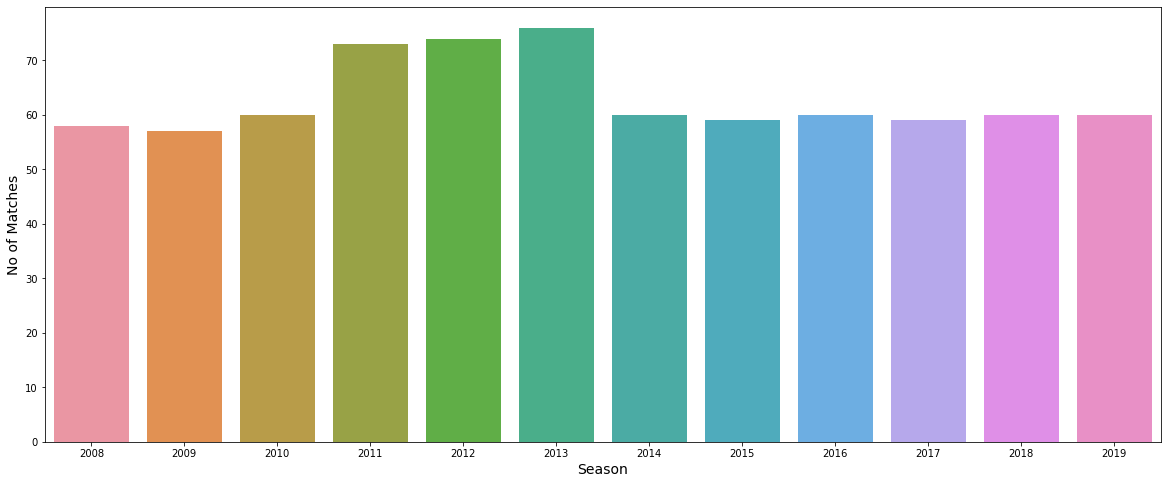

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(x='season',data=matches)
plt.xlabel('Season',size=14)
plt.ylabel('No of Matches',size=14)
plt.show()

# H) Toss Decision 

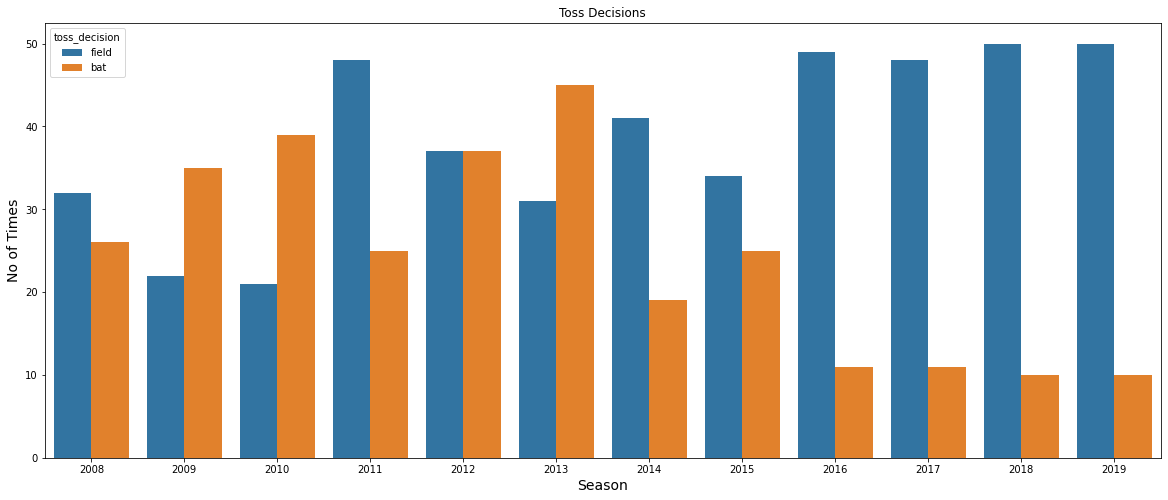

In [74]:
plt.subplots(figsize=(20,8))
sns.countplot(x='season',hue='toss_decision',data=matches )
plt.title("Toss Decisions")
plt.xlabel('Season',size=14)
plt.ylabel('No of Times',size=14)
plt.show()

# G) Maximum Win by Runs

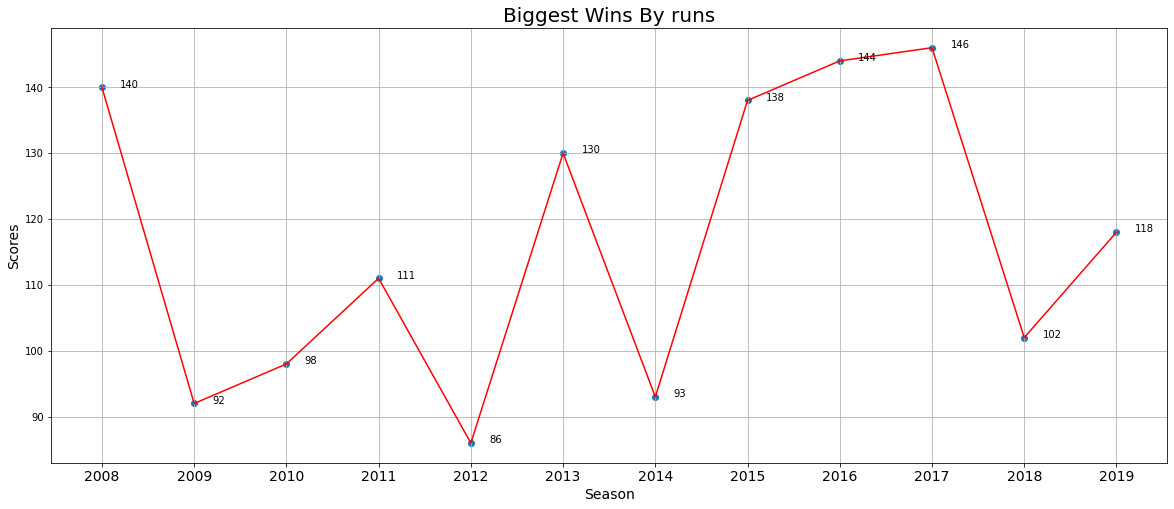

In [59]:
start=2008
season=[]
win_by_runs_max=[]
while start<2020:
    season.append(start)
    win_by_runs_max.append(matches[matches['season']==start]['win_by_runs'].max())
    start+=1
plt.figure(figsize=(20,8))
plt.plot(season,win_by_runs_max,color='red')
plt.scatter(season,win_by_runs_max)
plt.title('Biggest Wins By runs',size=20)
plt.xlabel('Season',size=14)
plt.ylabel('Scores',size=14)
plt.xticks(range(2008,2020),fontsize=14)
plt.grid(True)
count=0
while count<12:
    plt.text(season[count]+0.2,win_by_runs_max[count],str(win_by_runs_max[count]))
    count+=1
plt.show()

# I) Total Runs 

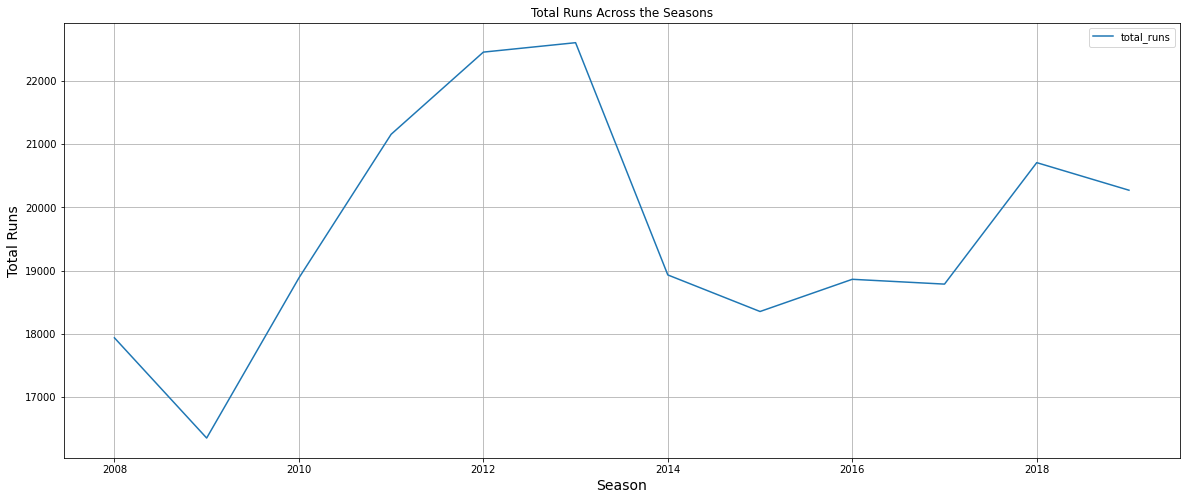

In [67]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot()
plt.gcf().set_size_inches(20,8)
plt.title('Total Runs Across the Seasons')
plt.xlabel('Season',size=14)
plt.ylabel('Total Runs',size=14)
plt.grid(True)
plt.show()

# J) Total Boundries

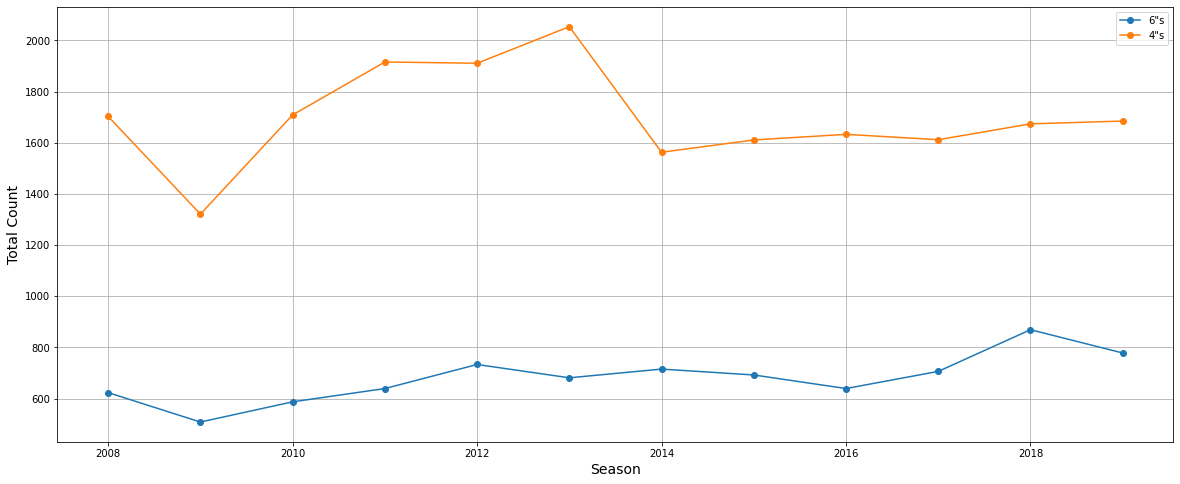

In [70]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.xlabel('Season',size=14)
plt.ylabel('Total Count',size=14)
plt.grid(True)
plt.show()

# K) Orange Cap Winners

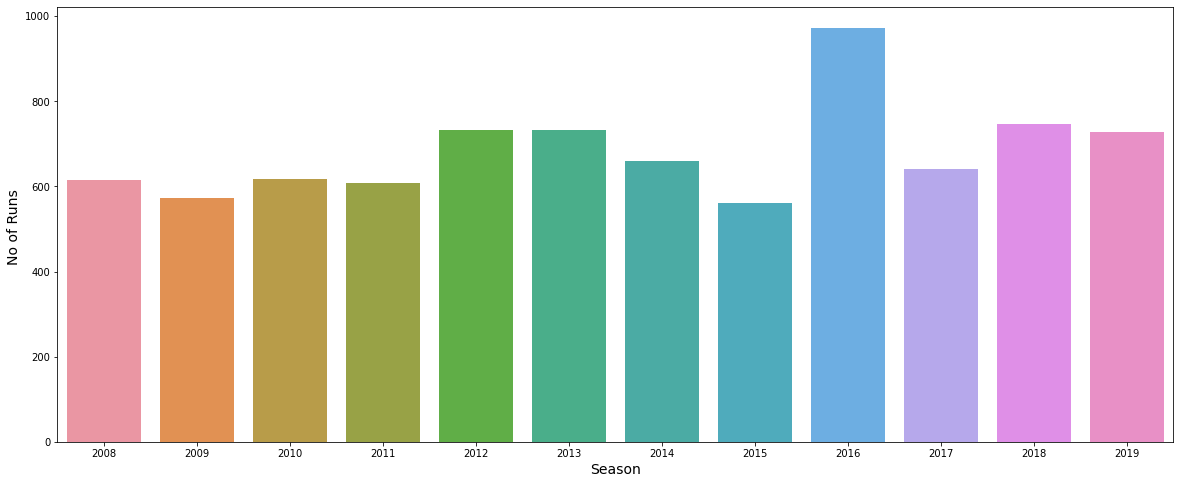

In [79]:
plt.figure(figsize=(20,8))
orange_cap = matches[['id','season']]
orange_cap = orange_cap.merge(deliveries,left_on = 'id', right_on = 'match_id')
orange_cap = orange_cap.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.sort_values('batsman_runs',ascending=False)
orange_cap = orange_cap.drop_duplicates(subset = ['season'],keep = 'first')
sns.barplot(x = 'season', y = 'batsman_runs', data = orange_cap)
plt.xlabel('Season',size=14)
plt.ylabel('No of Runs ',size=14)
plt.show()

# L) Purple Cap Winners

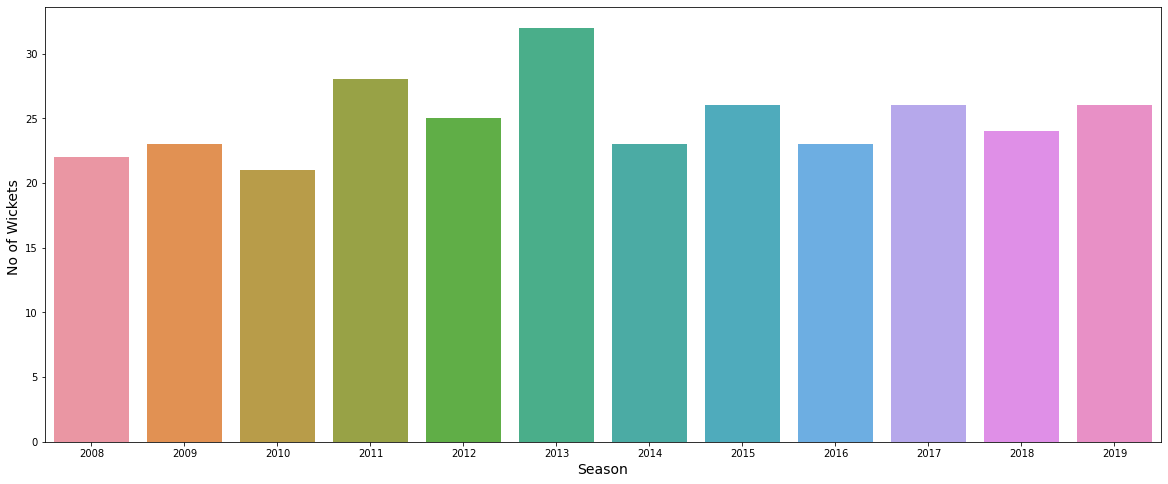

In [80]:
plt.figure(figsize=(20,8))
types_of_dismissal = [ 'caught', 'bowled', 'lbw', 'caught and bowled','stumped',  'hit wicket']
purple_cap = deliveries[deliveries['dismissal_kind'].isin(types_of_dismissal)]
purple_cap = purple_cap.merge(matches,left_on='match_id', right_on = 'id')
purple_cap = purple_cap.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple_cap = purple_cap.sort_values('dismissal_kind',ascending = False)
purple_cap = purple_cap.drop_duplicates('season',keep = 'first').sort_values(by='season')
purple_cap.columns=['season','bowler','count_wickets']
sns.barplot(x = 'season', y = 'count_wickets', data = purple_cap)
plt.xlabel('Season',size=14)
plt.ylabel('No of Wickets ',size=14)
plt.show()

# M) Highest Run by teams

In [81]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


# N) Highest Run by Players

In [82]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
10149,7935,RR Pant,Delhi Daredevils,130
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
3135,206,M Vijay,Chennai Super Kings,127
529,36,DA Warner,Sunrisers Hyderabad,126
7752,516,V Sehwag,Kings XI Punjab,122
10417,7953,SR Watson,Chennai Super Kings,121


# O) Stadium wise winnings

## 1) Feroz Shah Kotla

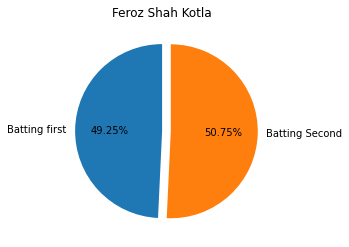

In [85]:
stadium1=matches.loc[(matches['venue']=='Feroz Shah Kotla') ]
stadium_win_by_runs=stadium1[stadium1['win_by_runs']>0]
slices=[len(stadium_win_by_runs),len(stadium1)-len(stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90, explode=(0,0.1),autopct='%1.2f%%')
plt.title('Feroz Shah Kotla')
plt.show()

## 2) Eden Gardens

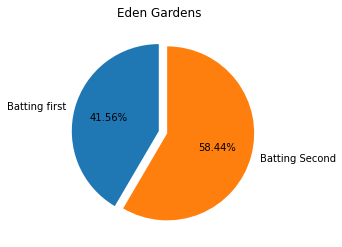

In [86]:
stadium2=matches.loc[(matches['venue']=='Eden Gardens') ]
stadium_win_by_runs=stadium2[stadium2['win_by_runs']>0]
slices=[len(stadium_win_by_runs),len(stadium2)-len(stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.1),autopct='%1.2f%%')
plt.title('Eden Gardens')
plt.show()

## 3) Wankhede Stadium

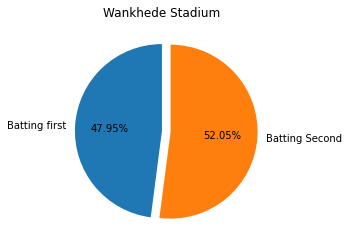

In [87]:
stadium3=matches.loc[(matches['venue']=='Wankhede Stadium') ]
stadium_win_by_runs=stadium3[stadium3['win_by_runs']>0]
slices=[len(stadium_win_by_runs),len(stadium3)-len(stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.1),autopct='%1.2f%%')
plt.title('Wankhede Stadium')
plt.show()

# Conclusion 


Most successful teams, players and factors contributing win or loss of a team:-

    Successful Teams: Mumbai Indians, Chennai Super Kings
    
    Successful Players: CH Gayle, V Kohli, S Dhawan.
    
    Most of the teams win the match by doing bowling first.
    
    Mostly teams whose win the toss will win the match

Suggesting company to endorse for its products on these:-

    Teams- Mumbai Indians, Chennai Super Kings
    
    Players- CH Gayle, V Kohli, SL Malinga